In [3]:
import pandas as pd

In [1]:
import pandas as pd

# 1) Load the two runs
grid_df  = pd.read_parquet("cv_params_grid.parquet")
bayes_df = pd.read_parquet("cv_params_bayes_float_kappa.parquet")

# 2) Inspect structure
print("=== Grid search DF ===")
print(grid_df.info())
display(grid_df.head())

print("\n=== Bayesian search DF ===")
print(bayes_df.info())
display(bayes_df.head())

# 3) Compare side‑by‑side
cmp = (
    grid_df
    .merge(bayes_df, on=["date","factor"], 
           suffixes=("_grid","_bayes"))
    .sort_values(["factor","date"])
)

print("\n=== Comparison ===")
display(cmp.head())

# 4) Quick stats on differences
cmp["delta_lambda"] = cmp["best_lambda_bayes"] - cmp["best_lambda_grid"]
cmp["delta_kappa" ] = cmp["best_kappa_bayes"]  - cmp["best_kappa_grid"]

print("\nLambda difference summary:")
print(cmp["delta_lambda"].describe())

print("\nKappa difference summary:")
print(cmp["delta_kappa"].describe())


=== Grid search DF ===
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         144 non-null    datetime64[ns]
 1   factor       144 non-null    object        
 2   best_lambda  144 non-null    float64       
 3   best_kappa   144 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 5.6+ KB
None


,date,factor,best_lambda,best_kappa
0,2014-01-31,iwf,297.931034,2.000000
6,2014-07-31,iwf,246.896552,2.000000
12,2015-01-30,iwf,144.827586,3.061553
18,2015-07-31,iwf,195.862069,3.061553
24,2016-01-29,iwf,30.000000,2.000000



=== Bayesian search DF ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         144 non-null    datetime64[ns]
 1   factor       144 non-null    object        
 2   best_lambda  144 non-null    float64       
 3   best_kappa   144 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.6+ KB
None


,date,factor,best_lambda,best_kappa
0,2014-01-31,iwf,142.377849,7.0
1,2014-07-31,iwf,95.201458,1.0
2,2015-01-30,iwf,755.350365,4.0
3,2015-07-31,iwf,213.683291,3.0
4,2016-01-29,iwf,32.401997,6.0



=== Comparison ===


,date,factor,best_lambda_grid,best_kappa_grid,best_lambda_bayes,best_kappa_bayes
0,2014-01-31,iwf,297.931034,2.000000,142.377849,7.0
1,2014-07-31,iwf,246.896552,2.000000,95.201458,1.0
2,2015-01-30,iwf,144.827586,3.061553,755.350365,4.0
3,2015-07-31,iwf,195.862069,3.061553,213.683291,3.0
4,2016-01-29,iwf,30.000000,2.000000,32.401997,6.0



Lambda difference summary:
count    144.000000
mean      47.894392
std      255.244813
min     -396.621796
25%      -55.096443
50%       -5.109276
75%       59.548497
max      705.102187
Name: delta_lambda, dtype: float64

Kappa difference summary:
count    144.000000
mean       2.111105
std        2.741577
min       -2.123106
25%       -0.015388
50%        1.969224
75%        4.000000
max        8.000000
Name: delta_kappa, dtype: float64


In [2]:
grid_df["best_lambda"].describe()

count    144.000000
mean     171.408046
std      119.510388
min       30.000000
25%       55.517241
50%      144.827586
75%      262.844828
max      400.000000
Name: best_lambda, dtype: float64

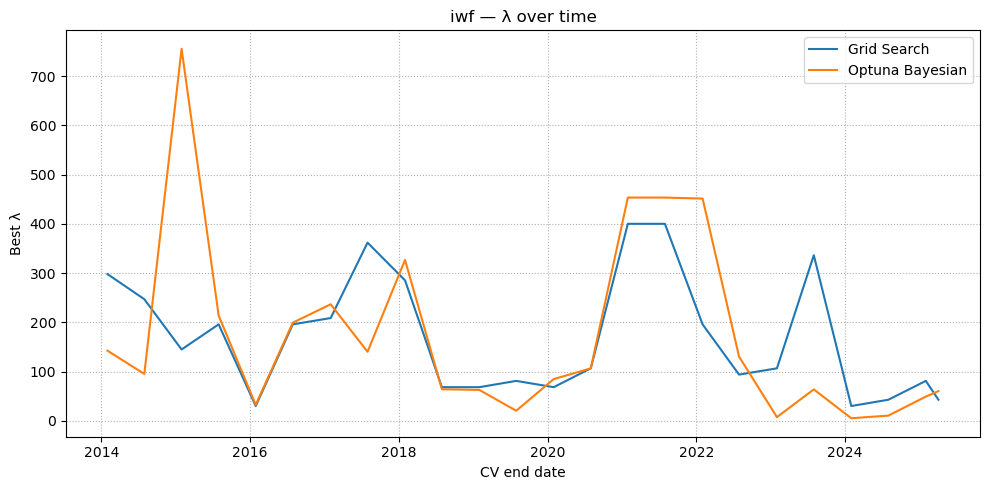

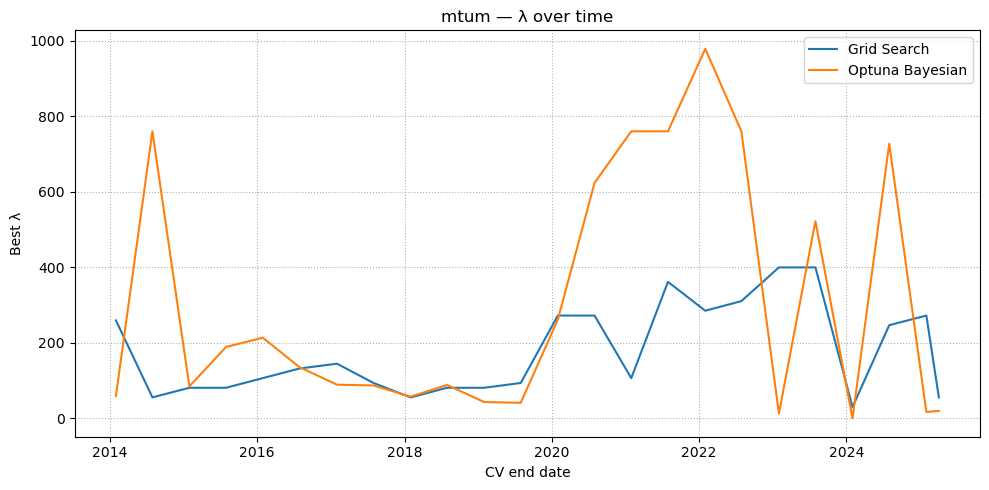

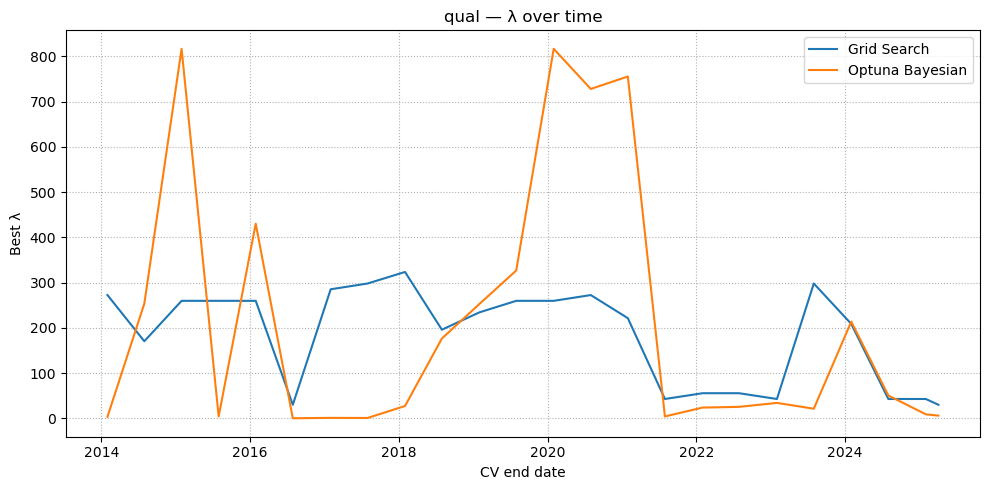

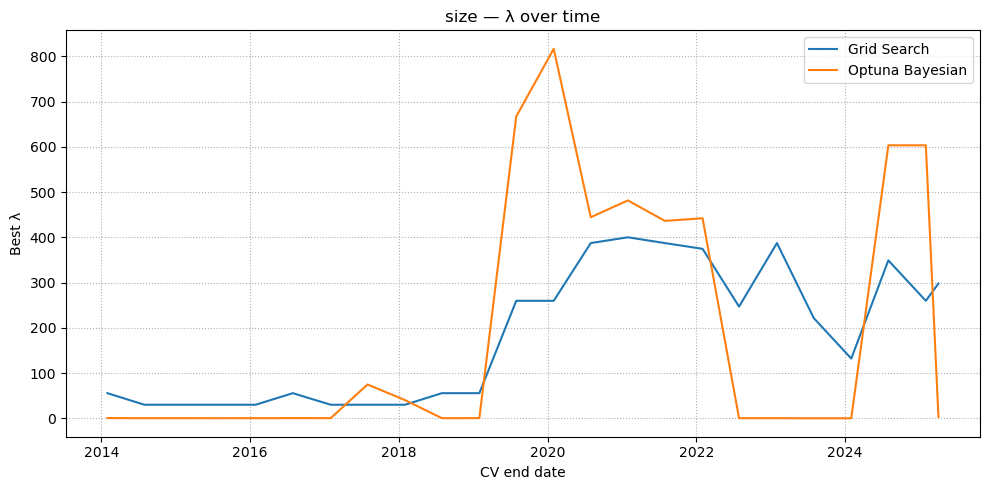

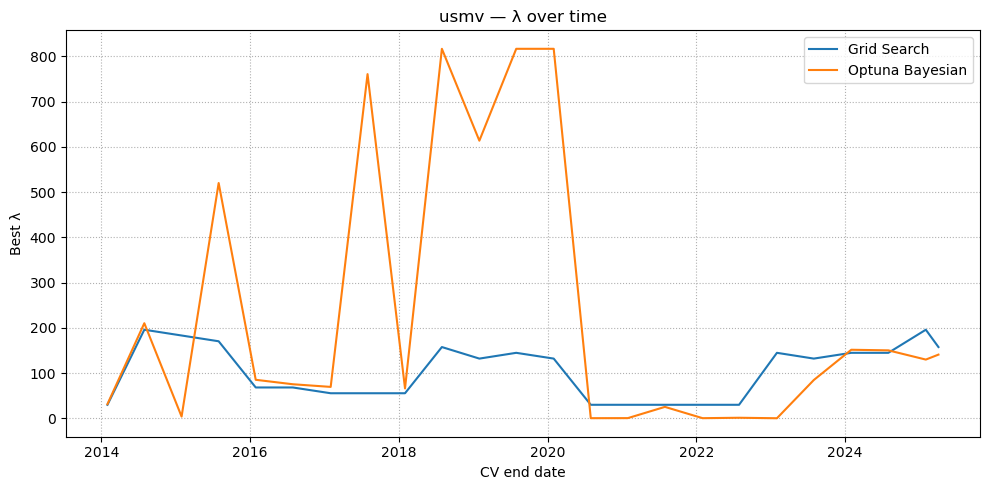

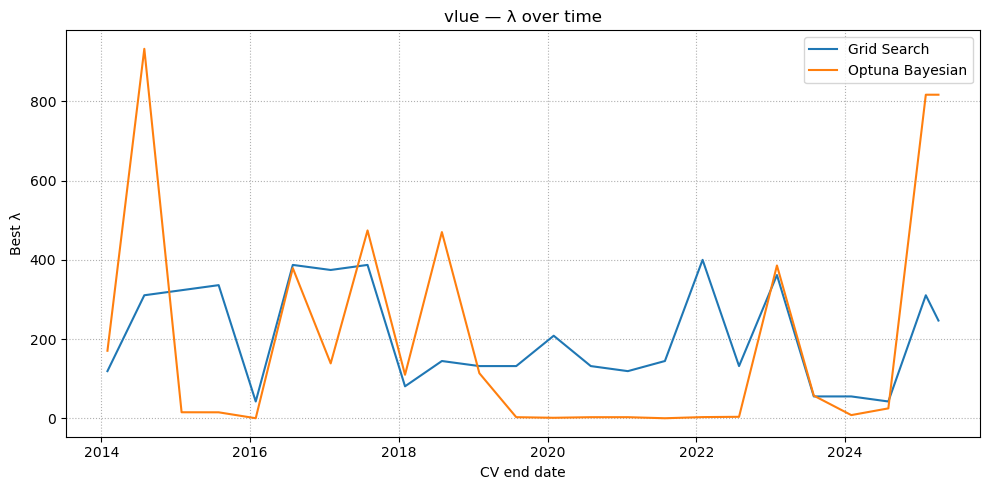

In [2]:
import matplotlib.pyplot as plt

# Ensure the date columns are datetime
grid_df['date']  = pd.to_datetime(grid_df['date'])
bayes_df['date'] = pd.to_datetime(bayes_df['date'])

# Get the list of factors
factors = sorted(grid_df['factor'].unique())

# Plot one figure per factor
for fac in factors:
    g = grid_df[ grid_df['factor']  == fac ].sort_values('date')
    b = bayes_df[bayes_df['factor'] == fac ].sort_values('date')
    
    plt.figure(figsize=(10,5))
    plt.plot(g['date'], g['best_lambda'], label='Grid Search')
    plt.plot(b['date'], b['best_lambda'], label='Optuna Bayesian')
    plt.title(f"{fac} — λ over time")
    plt.xlabel("CV end date")
    plt.ylabel("Best λ")
    plt.legend()
    plt.grid(True, ls=":")
    plt.tight_layout()
    plt.show()

In [3]:
hyperparameter_history = {
    'iwf': [
        {'date': pd.Timestamp('2017-01-31 00:00:00'), 'old_lambda': None, 'new_lambda': 194.44444444444446, 'old_kappa': None, 'new_kappa': 2.802775637731995, 'sharpe': -0.00040810662925682057},
        {'date': pd.Timestamp('2017-07-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 194.44444444444446, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': 0.17071973179690386},
        {'date': pd.Timestamp('2018-01-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 358.8888888888889, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.3578102263098243},
        {'date': pd.Timestamp('2018-07-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 358.8888888888889, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': 0.4841917963037153},
        {'date': pd.Timestamp('2019-01-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 358.8888888888889, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': 0.0021833092539811937},
        {'date': pd.Timestamp('2019-07-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 400.0, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': -0.08661718291998324},
        {'date': pd.Timestamp('2020-01-31 00:00:00'), 'old_lambda': 400.0, 'new_lambda': 400.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.04537836286365537},
        {'date': pd.Timestamp('2020-07-31 00:00:00'), 'old_lambda': 400.0, 'new_lambda': 400.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.3796416073101208},
        {'date': pd.Timestamp('2021-01-29 00:00:00'), 'old_lambda': 400.0, 'new_lambda': 400.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': 0.3143905966885326},
        {'date': pd.Timestamp('2021-07-30 00:00:00'), 'old_lambda': 400.0, 'new_lambda': 71.11111111111111, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.6565757223197191},
        {'date': pd.Timestamp('2022-01-31 00:00:00'), 'old_lambda': 71.11111111111111, 'new_lambda': 30.0, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.5661972679926426},
        {'date': pd.Timestamp('2022-07-29 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 194.44444444444446, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.5025574640511644},
        {'date': pd.Timestamp('2023-01-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 194.44444444444446, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.4412874588946835},
        {'date': pd.Timestamp('2023-07-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.6244571972898924},
        {'date': pd.Timestamp('2024-01-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.5496996539335203},
        {'date': pd.Timestamp('2024-07-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.5045344785461053},
        {'date': pd.Timestamp('2025-01-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 153.33333333333334, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.6748125011222248},
        {'date': pd.Timestamp('2025-04-03 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.5220707952568912}
    ],
    'mtum': [
        {'date': pd.Timestamp('2017-01-31 00:00:00'), 'old_lambda': None, 'new_lambda': 153.33333333333334, 'old_kappa': None, 'new_kappa': 3.605551275463989, 'sharpe': 0.9737531059727994},
        {'date': pd.Timestamp('2017-07-31 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 71.11111111111111, 'old_kappa': 3.605551275463989, 'new_kappa': 2.0, 'sharpe': 1.2385288514186117},
        {'date': pd.Timestamp('2018-01-31 00:00:00'), 'old_lambda': 71.11111111111111, 'new_lambda': 71.11111111111111, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.5384280936967225},
        {'date': pd.Timestamp('2018-07-31 00:00:00'), 'old_lambda': 71.11111111111111, 'new_lambda': 71.11111111111111, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.2449318483644662},
        {'date': pd.Timestamp('2019-01-31 00:00:00'), 'old_lambda': 71.11111111111111, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.2849216385777595},
        {'date': pd.Timestamp('2019-07-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.3550258164181153},
        {'date': pd.Timestamp('2020-01-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.2946985716778718},
        {'date': pd.Timestamp('2020-07-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.2443701401904304},
        {'date': pd.Timestamp('2021-01-29 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 30.0, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.0609358262039597},
        {'date': pd.Timestamp('2021-07-30 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 317.7777777777778, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.5336681869528377},
        {'date': pd.Timestamp('2022-01-31 00:00:00'), 'old_lambda': 317.7777777777778, 'new_lambda': 71.11111111111111, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': 0.42085014436258855},
        {'date': pd.Timestamp('2022-07-29 00:00:00'), 'old_lambda': 71.11111111111111, 'new_lambda': 71.11111111111111, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.4776764452885165},
        {'date': pd.Timestamp('2023-01-31 00:00:00'), 'old_lambda': 71.11111111111111, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 3.605551275463989, 'sharpe': 0.29425697780975163},
        {'date': pd.Timestamp('2023-07-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.12389367197312393},
        {'date': pd.Timestamp('2024-01-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 235.55555555555557, 'old_kappa': 3.605551275463989, 'new_kappa': 2.802775637731995, 'sharpe': 0.30857404399436067},
        {'date': pd.Timestamp('2024-07-31 00:00:00'), 'old_lambda': 235.55555555555557, 'new_lambda': 358.8888888888889, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': 0.39916193058999083},
        {'date': pd.Timestamp('2025-01-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 276.6666666666667, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.29269886811293266},
        {'date': pd.Timestamp('2025-04-03 00:00:00'), 'old_lambda': 276.6666666666667, 'new_lambda': 358.8888888888889, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.48260717116695645}
    ],
    'qual': [
        {'date': pd.Timestamp('2017-01-31 00:00:00'), 'old_lambda': None, 'new_lambda': 112.22222222222223, 'old_kappa': None, 'new_kappa': 2.0, 'sharpe': -0.008942944608080107},
        {'date': pd.Timestamp('2017-07-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 194.44444444444446, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': 0.3729840213884896},
        {'date': pd.Timestamp('2018-01-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 276.6666666666667, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': 0.4569557693250369},
        {'date': pd.Timestamp('2018-07-31 00:00:00'), 'old_lambda': 276.6666666666667, 'new_lambda': 276.6666666666667, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.46645808224234},
        {'date': pd.Timestamp('2019-01-31 00:00:00'), 'old_lambda': 276.6666666666667, 'new_lambda': 317.7777777777778, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.44970951739981563},
        {'date': pd.Timestamp('2019-07-31 00:00:00'), 'old_lambda': 317.7777777777778, 'new_lambda': 358.8888888888889, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.4565696219766751},
        {'date': pd.Timestamp('2020-01-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 276.6666666666667, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.515467869569287},
        {'date': pd.Timestamp('2020-07-31 00:00:00'), 'old_lambda': 276.6666666666667, 'new_lambda': 30.0, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': 0.34082022634710635},
        {'date': pd.Timestamp('2021-01-29 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 3.605551275463989, 'sharpe': 0.43043837227656606},
        {'date': pd.Timestamp('2021-07-30 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 235.55555555555557, 'old_kappa': 3.605551275463989, 'new_kappa': 2.0, 'sharpe': 0.48545612296409024},
        {'date': pd.Timestamp('2022-01-31 00:00:00'), 'old_lambda': 235.55555555555557, 'new_lambda': 235.55555555555557, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': 0.24680166988096894},
        {'date': pd.Timestamp('2022-07-29 00:00:00'), 'old_lambda': 235.55555555555557, 'new_lambda': 194.44444444444446, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': 0.3768471604383053},
        {'date': pd.Timestamp('2023-01-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 235.55555555555557, 'old_kappa': 2.0, 'new_kappa': 3.605551275463989, 'sharpe': 0.52515080472428},
        {'date': pd.Timestamp('2023-07-31 00:00:00'), 'old_lambda': 235.55555555555557, 'new_lambda': 276.6666666666667, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.5032881257329227},
        {'date': pd.Timestamp('2024-01-31 00:00:00'), 'old_lambda': 276.6666666666667, 'new_lambda': 276.6666666666667, 'old_kappa': 3.605551275463989, 'new_kappa': 2.0, 'sharpe': 0.5601170142538924},
        {'date': pd.Timestamp('2024-07-31 00:00:00'), 'old_lambda': 276.6666666666667, 'new_lambda': 30.0, 'old_kappa': 2.0, 'new_kappa': 3.605551275463989, 'sharpe': 0.6556926212774876},
        {'date': pd.Timestamp('2025-01-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 3.605551275463989, 'new_kappa': 2.802775637731995, 'sharpe': 0.6397538574423197},
        {'date': pd.Timestamp('2025-04-03 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 3.605551275463989, 'sharpe': 0.595839463815995}
    ],
    'size': [
        {'date': pd.Timestamp('2017-01-31 00:00:00'), 'old_lambda': None, 'new_lambda': 30.0, 'old_kappa': None, 'new_kappa': 3.605551275463989, 'sharpe': 0.18325758924372446},
        {'date': pd.Timestamp('2017-07-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.35998093208599363},
        {'date': pd.Timestamp('2018-01-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 3.605551275463989, 'new_kappa': 2.802775637731995, 'sharpe': 0.20754182203863084},
        {'date': pd.Timestamp('2018-07-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 3.605551275463989, 'sharpe': 0.169026897105994},
        {'date': pd.Timestamp('2019-01-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.170613601033382},
        {'date': pd.Timestamp('2019-07-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.08232751636587375},
        {'date': pd.Timestamp('2020-01-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 194.44444444444446, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.07975853398451298},
        {'date': pd.Timestamp('2020-07-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 194.44444444444446, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.20993440803949895},
        {'date': pd.Timestamp('2021-01-29 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 235.55555555555557, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.16038247250831156},
        {'date': pd.Timestamp('2021-07-30 00:00:00'), 'old_lambda': 235.55555555555557, 'new_lambda': 317.7777777777778, 'old_kappa': 3.605551275463989, 'new_kappa': 2.0, 'sharpe': -0.018202918861167948},
        {'date': pd.Timestamp('2022-01-31 00:00:00'), 'old_lambda': 317.7777777777778, 'new_lambda': 400.0, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.036480646039279585},
        {'date': pd.Timestamp('2022-07-29 00:00:00'), 'old_lambda': 400.0, 'new_lambda': 358.8888888888889, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': 0.36563761781827314},
        {'date': pd.Timestamp('2023-01-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 317.7777777777778, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': 0.32185546293215544},
        {'date': pd.Timestamp('2023-07-31 00:00:00'), 'old_lambda': 317.7777777777778, 'new_lambda': 317.7777777777778, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.2798812792489098},
        {'date': pd.Timestamp('2024-01-31 00:00:00'), 'old_lambda': 317.7777777777778, 'new_lambda': 358.8888888888889, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': 0.452087066336667},
        {'date': pd.Timestamp('2024-07-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 358.8888888888889, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.5006537077202152},
        {'date': pd.Timestamp('2025-01-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 317.7777777777778, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.5716957249478238},
        {'date': pd.Timestamp('2025-04-03 00:00:00'), 'old_lambda': 317.7777777777778, 'new_lambda': 317.7777777777778, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.4431237089045836}
    ],
    'usmv': [
        {'date': pd.Timestamp('2017-01-31 00:00:00'), 'old_lambda': None, 'new_lambda': 30.0, 'old_kappa': None, 'new_kappa': 2.0, 'sharpe': -0.018377230113554608},
        {'date': pd.Timestamp('2017-07-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 400.0, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.22709101622189878},
        {'date': pd.Timestamp('2018-01-31 00:00:00'), 'old_lambda': 400.0, 'new_lambda': 194.44444444444446, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': -0.11574479947038052},
        {'date': pd.Timestamp('2018-07-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 194.44444444444446, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': -0.13169461167089427},
        {'date': pd.Timestamp('2019-01-31 00:00:00'), 'old_lambda': 194.44444444444446, 'new_lambda': 112.22222222222223, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': -0.04023257907985476},
        {'date': pd.Timestamp('2019-07-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 71.11111111111111, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': -0.09485108586318038},
        {'date': pd.Timestamp('2020-01-31 00:00:00'), 'old_lambda': 71.11111111111111, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': -0.20505014291457693},
        {'date': pd.Timestamp('2020-07-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 2.0, 'new_kappa': 2.802775637731995, 'sharpe': -0.21124341082069295},
        {'date': pd.Timestamp('2021-01-29 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.27357211138032833},
        {'date': pd.Timestamp('2021-07-30 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.12318043827830945},
        {'date': pd.Timestamp('2022-01-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 3.605551275463989, 'sharpe': -0.027488565563862734},
        {'date': pd.Timestamp('2022-07-29 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 3.605551275463989, 'new_kappa': 2.802775637731995, 'sharpe': 0.00615644148977025},
        {'date': pd.Timestamp('2023-01-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 276.6666666666667, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.1102054318041255},
        {'date': pd.Timestamp('2023-07-31 00:00:00'), 'old_lambda': 276.6666666666667, 'new_lambda': 153.33333333333334, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.18972149133249572},
        {'date': pd.Timestamp('2024-01-31 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.09270063511915752},
        {'date': pd.Timestamp('2024-07-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 30.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.23279385139850495},
        {'date': pd.Timestamp('2025-01-31 00:00:00'), 'old_lambda': 30.0, 'new_lambda': 153.33333333333334, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.30721578219158546},
        {'date': pd.Timestamp('2025-04-03 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 153.33333333333334, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': 0.25005959115900506}
    ],
    'vlue': [
        {'date': pd.Timestamp('2017-01-31 00:00:00'), 'old_lambda': None, 'new_lambda': 112.22222222222223, 'old_kappa': None, 'new_kappa': 2.0, 'sharpe': 0.9808698623368385},
        {'date': pd.Timestamp('2017-07-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 317.7777777777778, 'old_kappa': 2.0, 'new_kappa': 3.605551275463989, 'sharpe': 0.8394277858533714},
        {'date': pd.Timestamp('2018-01-31 00:00:00'), 'old_lambda': 317.7777777777778, 'new_lambda': 276.6666666666667, 'old_kappa': 3.605551275463989, 'new_kappa': 2.0, 'sharpe': 1.006140466878844},
        {'date': pd.Timestamp('2018-07-31 00:00:00'), 'old_lambda': 276.6666666666667, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.0366275635711821},
        {'date': pd.Timestamp('2019-01-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 112.22222222222223, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 1.0882139211247348},
        {'date': pd.Timestamp('2019-07-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 358.8888888888889, 'old_kappa': 2.0, 'new_kappa': 3.605551275463989, 'sharpe': 0.6059643491080812},
        {'date': pd.Timestamp('2020-01-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 358.8888888888889, 'old_kappa': 3.605551275463989, 'new_kappa': 2.802775637731995, 'sharpe': 0.39346946308603115},
        {'date': pd.Timestamp('2020-07-31 00:00:00'), 'old_lambda': 358.8888888888889, 'new_lambda': 153.33333333333334, 'old_kappa': 2.802775637731995, 'new_kappa': 3.605551275463989, 'sharpe': 0.350841470339303},
        {'date': pd.Timestamp('2021-01-29 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 153.33333333333334, 'old_kappa': 3.605551275463989, 'new_kappa': 3.605551275463989, 'sharpe': 0.4540450646485634},
        {'date': pd.Timestamp('2021-07-30 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 235.55555555555557, 'old_kappa': 3.605551275463989, 'new_kappa': 2.802775637731995, 'sharpe': 0.45721111621311916},
        {'date': pd.Timestamp('2022-01-31 00:00:00'), 'old_lambda': 235.55555555555557, 'new_lambda': 112.22222222222223, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.4393294952136704},
        {'date': pd.Timestamp('2022-07-29 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 153.33333333333334, 'old_kappa': 2.802775637731995, 'new_kappa': 2.802775637731995, 'sharpe': 0.538921576147189},
        {'date': pd.Timestamp('2023-01-31 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 112.22222222222223, 'old_kappa': 2.802775637731995, 'new_kappa': 3.605551275463989, 'sharpe': 0.3856975910925221},
        {'date': pd.Timestamp('2023-07-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 153.33333333333334, 'old_kappa': 3.605551275463989, 'new_kappa': 2.802775637731995, 'sharpe': 0.3300623151991221},
        {'date': pd.Timestamp('2024-01-31 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 153.33333333333334, 'old_kappa': 2.802775637731995, 'new_kappa': 3.605551275463989, 'sharpe': 0.31531828237806936},
        {'date': pd.Timestamp('2024-07-31 00:00:00'), 'old_lambda': 153.33333333333334, 'new_lambda': 112.22222222222223, 'old_kappa': 3.605551275463989, 'new_kappa': 2.802775637731995, 'sharpe': 0.22277643742023429},
        {'date': pd.Timestamp('2025-01-31 00:00:00'), 'old_lambda': 112.22222222222223, 'new_lambda': 400.0, 'old_kappa': 2.802775637731995, 'new_kappa': 2.0, 'sharpe': -0.059024223017440335},
        {'date': pd.Timestamp('2025-04-03 00:00:00'), 'old_lambda': 400.0, 'new_lambda': 400.0, 'old_kappa': 2.0, 'new_kappa': 2.0, 'sharpe': 0.05808658892901897}
    ]
}


In [ ]:
import pandas as pd

# 1) Flatten the dict into a list of records
records = []
for factor, hist in hyperparameter_history.items():
    for entry in hist:
        records.append({
            "date":        entry["date"],
            "factor":      factor,
            "best_lambda": entry["new_lambda"],
            "best_kappa":  entry["new_kappa"]
        })

# 2) Build the DataFrame
history_df = pd.DataFrame(records)

# 3) Clean up types & sort
history_df["date"] = pd.to_datetime(history_df["date"])
history_df = history_df.sort_values(["factor","date"]).reset_index(drop=True)

# 4) (Optional) Inspect
print(history_df.head())
print(history_df.dtypes)

# 5) (Optional) Save to parquet for downstream use
#history_df.to_parquet("cv_params_history.parquet", index=False)


        date factor  best_lambda  best_kappa
0 2017-01-31    iwf   194.444444    2.802776
1 2017-07-31    iwf   194.444444    2.000000
2 2018-01-31    iwf   358.888889    2.000000
3 2018-07-31    iwf   358.888889    2.802776
4 2019-01-31    iwf   358.888889    2.000000
date           datetime64[ns]
factor                 object
best_lambda           float64
best_kappa            float64
dtype: object


In [5]:


# 2) Define a quick function to show columns + dtypes
def show_schema(df, name):
    print(f"--- {name} schema ---")
    print(df.dtypes)
    print("Columns:", list(df.columns))
    print()

# 3) Display each
show_schema(grid_df,    "Grid")
show_schema(bayes_df,   "Bayesian")
show_schema(history_df, "History")

# 4) Assertions to make sure they're identical
expected_cols = ["date", "factor", "best_lambda", "best_kappa"]
for df, name in [(grid_df,"Grid"), (bayes_df,"Bayes"), (history_df,"History")]:
    assert list(df.columns) == expected_cols, f"{name} has wrong columns"
    # All dtypes must match the grid_df’s
    for col in expected_cols:
        assert df[col].dtype == grid_df[col].dtype, (
            f"{name}.{col} dtype {df[col].dtype} != grid.{col} dtype {grid_df[col].dtype}"
        )

print("✔ All three DataFrames have the same structure and dtypes.")


--- Grid schema ---
date           datetime64[ns]
factor                 object
best_lambda           float64
best_kappa            float64
dtype: object
Columns: ['date', 'factor', 'best_lambda', 'best_kappa']

--- Bayesian schema ---
date           datetime64[ns]
factor                 object
best_lambda           float64
best_kappa            float64
dtype: object
Columns: ['date', 'factor', 'best_lambda', 'best_kappa']

--- History schema ---
date           datetime64[ns]
factor                 object
best_lambda           float64
best_kappa            float64
dtype: object
Columns: ['date', 'factor', 'best_lambda', 'best_kappa']

✔ All three DataFrames have the same structure and dtypes.


            Δλ       Δκ
src                    
count  144.000  144.000
mean    47.894    2.111
std    255.245    2.742
min   -396.622   -2.123
25%    -55.096   -0.015
50%     -5.109    1.969
75%     59.548    4.000
max    705.102    8.000


C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:54: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


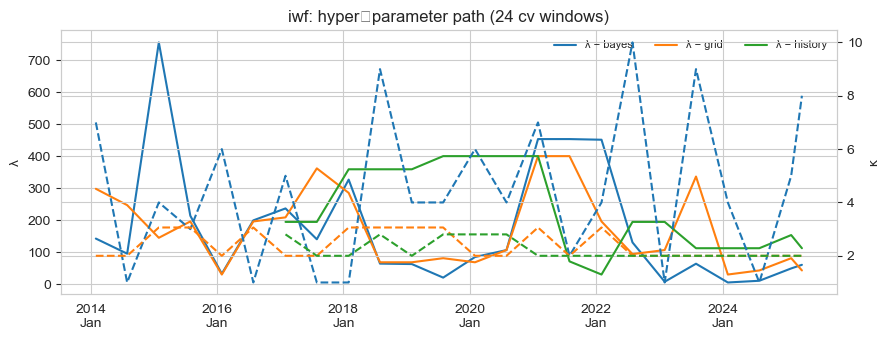

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:75: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


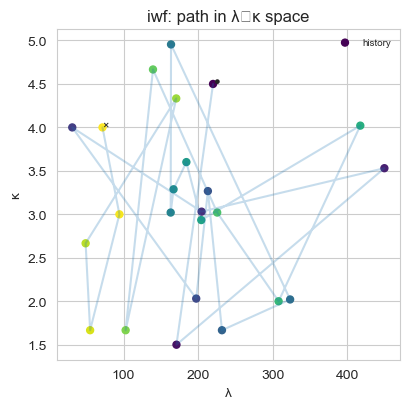

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:54: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


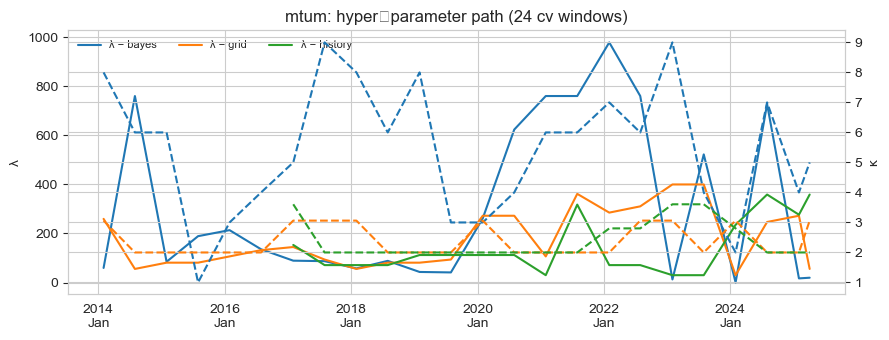

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:75: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


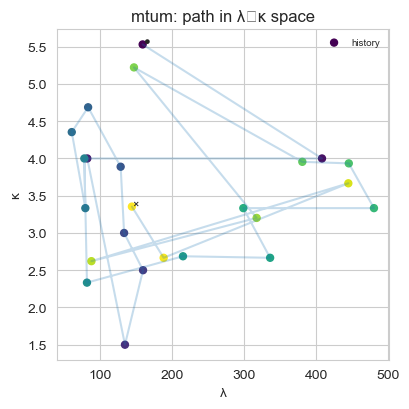

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:54: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


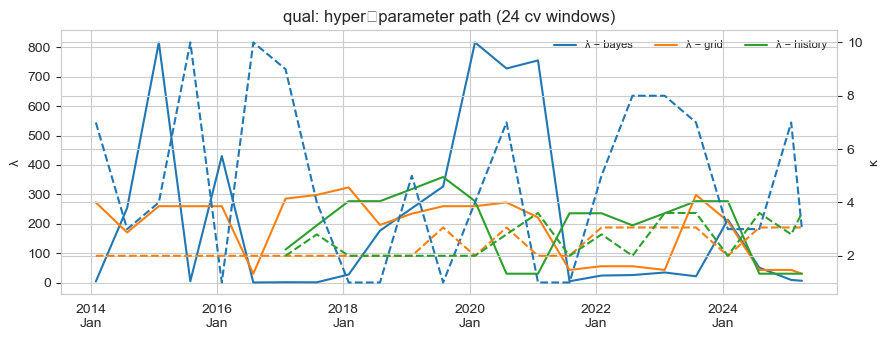

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:75: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


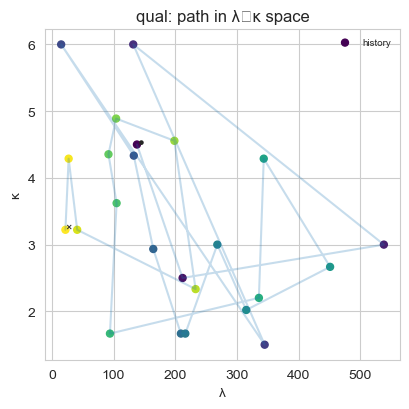

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:54: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


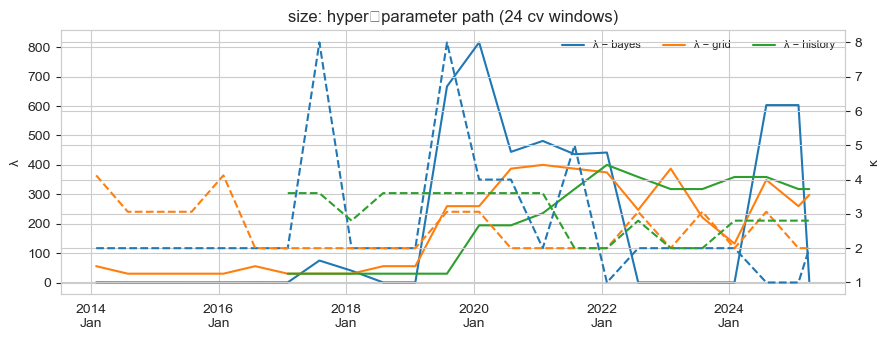

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:75: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


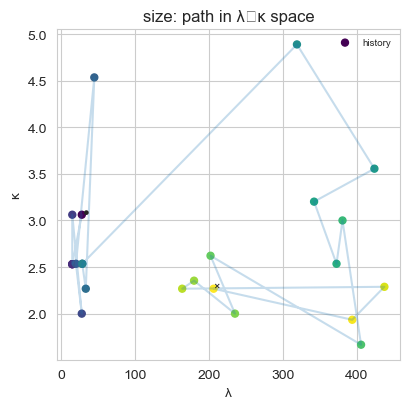

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:54: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


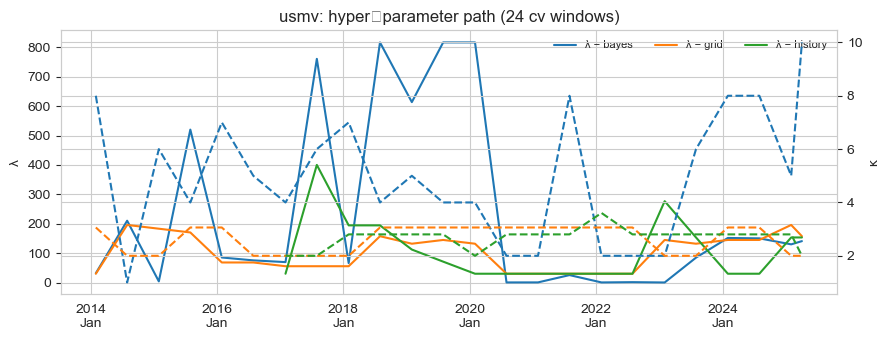

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:75: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


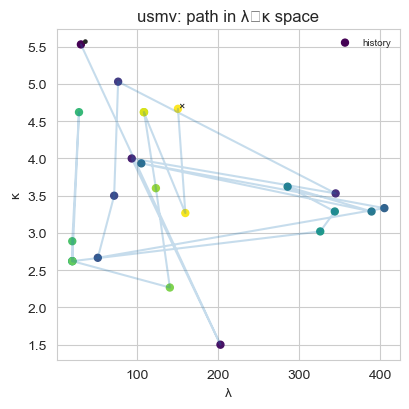

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:54: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


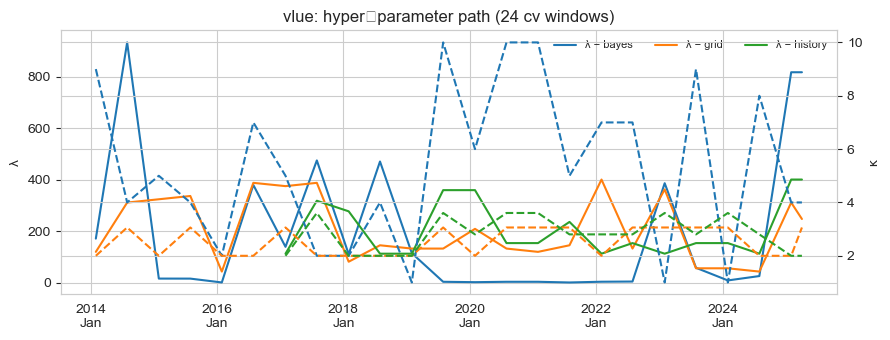

C:\Users\victo\AppData\Local\Temp\ipykernel_13136\622296446.py:75: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.tight_layout()
d:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


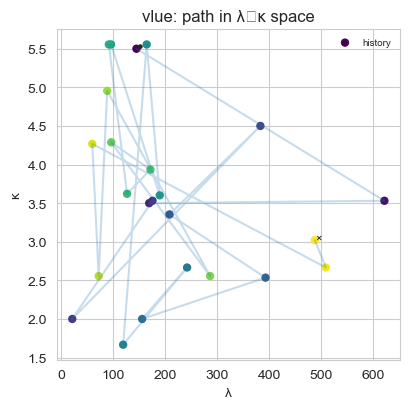

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns                    # only needs pip install seaborn

# ------------------------------------------------------------------
# 1) Load & tag each run
grid   = pd.read_parquet("cv_params_grid.parquet").assign(src="grid")
bayes  = pd.read_parquet("cv_params_bayes_float_kappa.parquet").assign(src="bayes")
hist   = pd.read_parquet("cv_params_history.parquet").assign(src="history")

# 2) Concatenate → long form
all_df = (
    pd.concat([grid, bayes, hist], ignore_index=True)
      .melt(id_vars=["date", "factor", "src"],
            value_vars=["best_lambda", "best_kappa"],
            var_name="param", value_name="value")
      .sort_values(["factor", "param", "date"])
)
all_df["date"] = pd.to_datetime(all_df["date"])

# 3) Instant pivot with deltas (grid as baseline)
pivot = (
    pd.concat([grid, bayes], ignore_index=True)
      .pivot(index=["date", "factor"], columns="src")
)
pivot["Δλ"] = pivot[("best_lambda", "bayes")] - pivot[("best_lambda", "grid")]
pivot["Δκ"] = pivot[("best_kappa", "bayes" )] - pivot[("best_kappa", "grid")]
pivot = pivot.reset_index()  # handy for joins / plotting

# 4) Quick numeric snapshot
print(pivot[["Δλ", "Δκ"]].describe().round(3))

# ------------------------------------------------------------------
# 5) Visual diagnostics
sns.set_style("whitegrid")
for fac in sorted(all_df["factor"].unique()):
    sub = all_df[all_df["factor"] == fac]

    # --- 5a Time‑series (λ & κ on twin y‑axes) --------------
    fig, ax_l = plt.subplots(figsize=(9, 3.5))
    ax_r = ax_l.twinx()

    for src, g in sub[sub.param == "best_lambda"].groupby("src"):
        ax_l.plot(g["date"], g["value"], label=f"λ − {src}")
    for src, g in sub[sub.param == "best_kappa"].groupby("src"):
        ax_r.plot(g["date"], g["value"], ls="--", label=f"κ − {src}")

    ax_l.xaxis.set_major_formatter(mdates.DateFormatter("%Y\n%b"))
    ax_l.set_title(f"{fac}: hyper‑parameter path ({len(sub['date'].unique())} cv windows)")
    ax_l.set_ylabel("λ")
    ax_r.set_ylabel("κ")
    ax_l.legend(frameon=False, ncol=3, fontsize=8)
    fig.tight_layout()
    plt.show()

    # --- 5b λ‑κ space path, coloured by date ---------------
    fig, ax = plt.subplots(figsize=(4.2, 4.2))
    cmap = plt.get_cmap("viridis")

    for src, g in sub.pivot_table(index="date",
                                  columns="param",
                                  values="value").assign(src=src).groupby("src"):
        g = g.reset_index()
        colours = cmap((g["date"] - g["date"].min()).dt.days / (g["date"].max() - g["date"].min()).days)
        ax.scatter(g["best_lambda"], g["best_kappa"], c=colours, s=25, label=src)
        ax.plot(g["best_lambda"], g["best_kappa"], alpha=.25)
        ax.text(g["best_lambda"].iloc[0], g["best_kappa"].iloc[0], "●", fontsize=8)  # start
        ax.text(g["best_lambda"].iloc[-1], g["best_kappa"].iloc[-1], "×", fontsize=8)  # end

    ax.set_xlabel("λ")
    ax.set_ylabel("κ")
    ax.set_title(f"{fac}: path in λ‑κ space")
    ax.legend(frameon=False, fontsize=7)
    fig.tight_layout()
    plt.show()


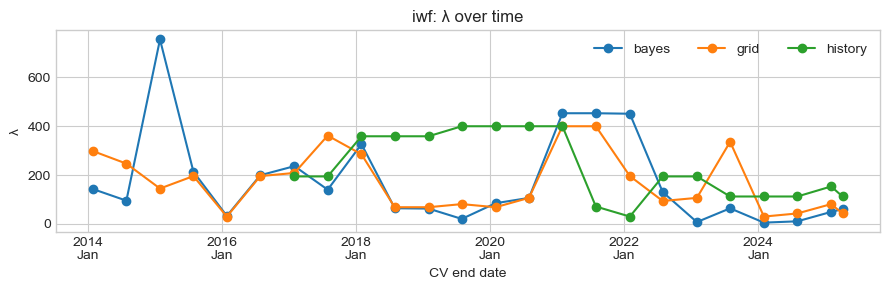

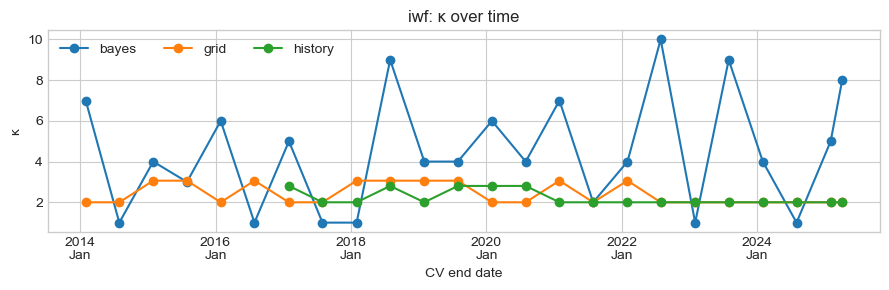

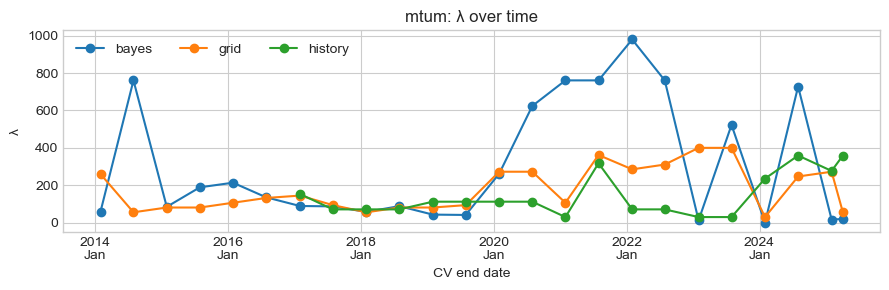

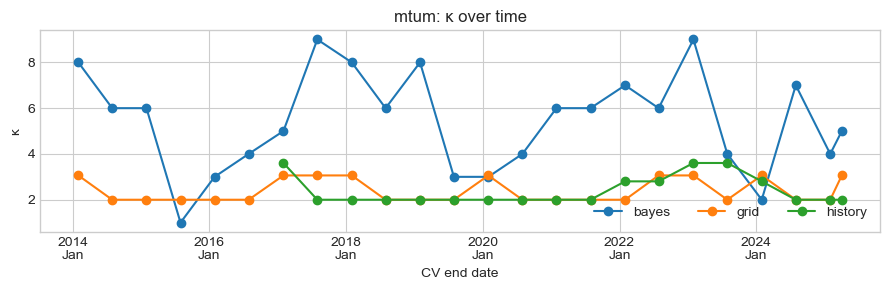

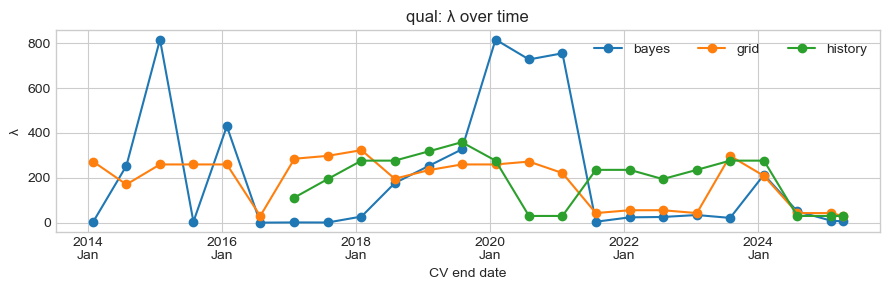

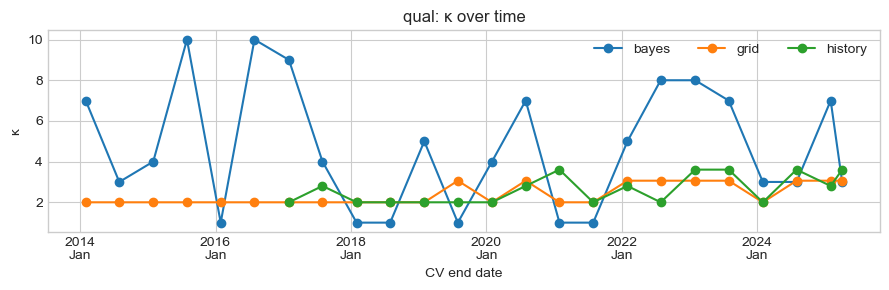

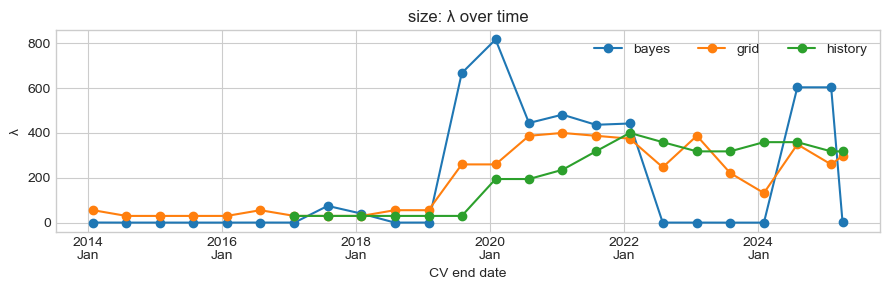

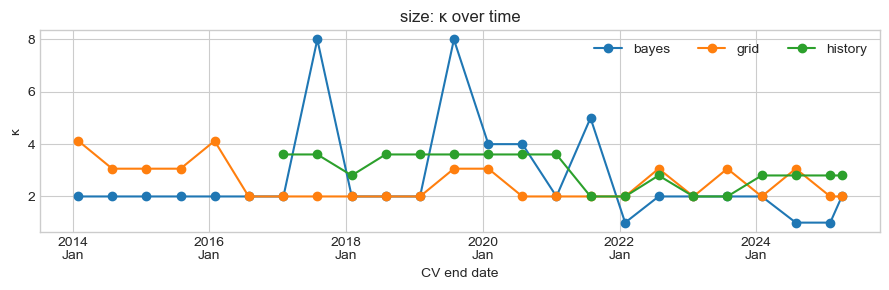

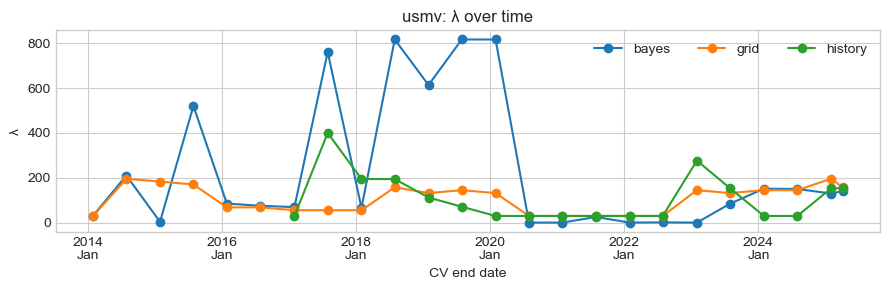

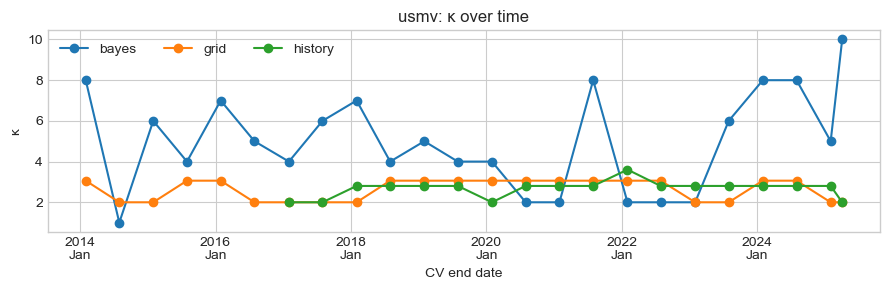

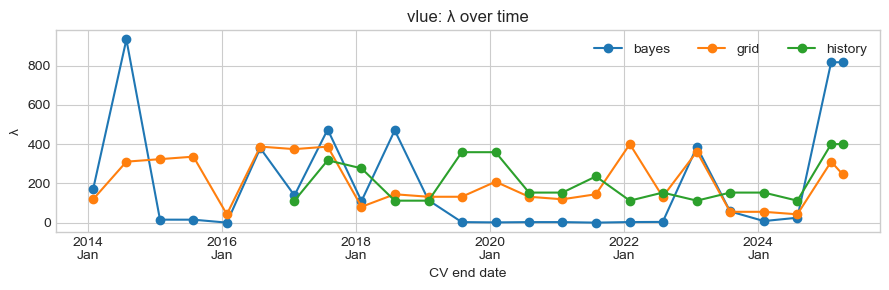

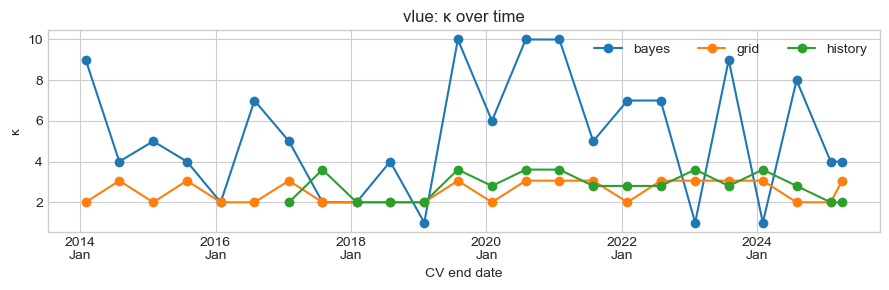


Δλ & Δκ summary (grid vs bayes):
            Δλ       Δκ
count  144.000  144.000
mean    47.894    2.111
std    255.245    2.742
min   -396.622   -2.123
25%    -55.096   -0.015
50%     -5.109    1.969
75%     59.548    4.000
max    705.102    8.000


In [13]:
# =============================================================================
# Hyper‑parameter comparison – grid, bayes **and history** in every plot
# =============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) LOAD
grid   = pd.read_parquet("cv_params_grid.parquet").assign(src="grid")
bayes  = pd.read_parquet("cv_params_bayes_float_kappa.parquet").assign(src="bayes")
hist   = pd.read_parquet("cv_params_history.parquet").assign(src="history")

for df in (grid, bayes, hist):
    df["date"] = pd.to_datetime(df["date"])

# 2) LONG FORM (all sources)
all_df = (
    pd.concat([grid, bayes, hist], ignore_index=True)
      .melt(id_vars=["date", "factor", "src"],
            value_vars=["best_lambda", "best_kappa"],
            var_name="param", value_name="value")
)

# 3) WIDE PIVOT (only grid & bayes) – still useful for Δλ / Δκ
cmp_src = pd.concat([grid, bayes], ignore_index=True)
pivot = cmp_src.pivot_table(index=["date", "factor"],
                            columns="src",
                            values=["best_lambda", "best_kappa"])
pivot.columns = [f"{param}_{src}" for param, src in pivot.columns]
pivot = pivot.reset_index()
pivot["Δλ"] = pivot["best_lambda_bayes"] - pivot["best_lambda_grid"]
pivot["Δκ"] = pivot["best_kappa_bayes"] - pivot["best_kappa_grid"]

# 4) PLOTS – λ and κ over time, *all* sources
plt.style.use("seaborn-v0_8-whitegrid")
for fac in sorted(all_df["factor"].unique()):
    for param, ylabel in [("best_lambda", "λ"), ("best_kappa", "κ")]:
        sub = all_df[(all_df["factor"] == fac) & (all_df["param"] == param)]
        plt.figure(figsize=(9, 3))
        for src, g in sub.groupby("src"):
            plt.plot(g["date"], g["value"], marker="o", label=src)
        plt.title(f"{fac}: {ylabel} over time")
        plt.ylabel(ylabel)
        plt.xlabel("CV end date")
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y\n%b"))
        plt.legend(frameon=False, ncol=3)
        plt.tight_layout()
        plt.show()

# 5) OPTIONAL numeric snapshot
print("\nΔλ & Δκ summary (grid vs bayes):")
print(pivot[["Δλ", "Δκ"]].describe().round(3))


In [14]:
# overwrite best_lambda with each constant and save to parquet
for lam in (50, 75, 100, 200, 300, 400):
    (
        history_df.assign(best_lambda=lam)        # replace column
                  .to_parquet(f"cv_params_history_lambda{lam}.parquet",
                              index=False)
    )


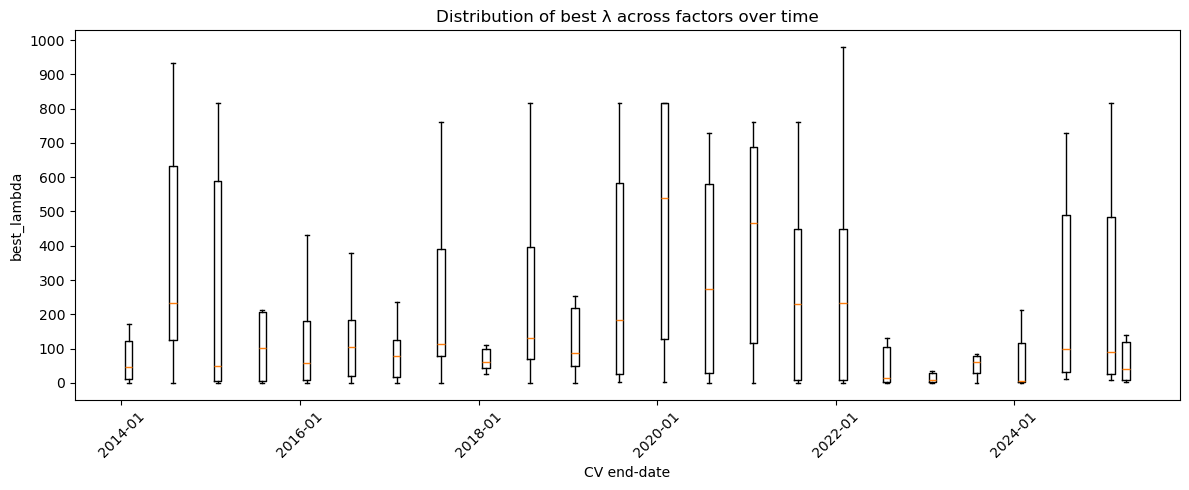

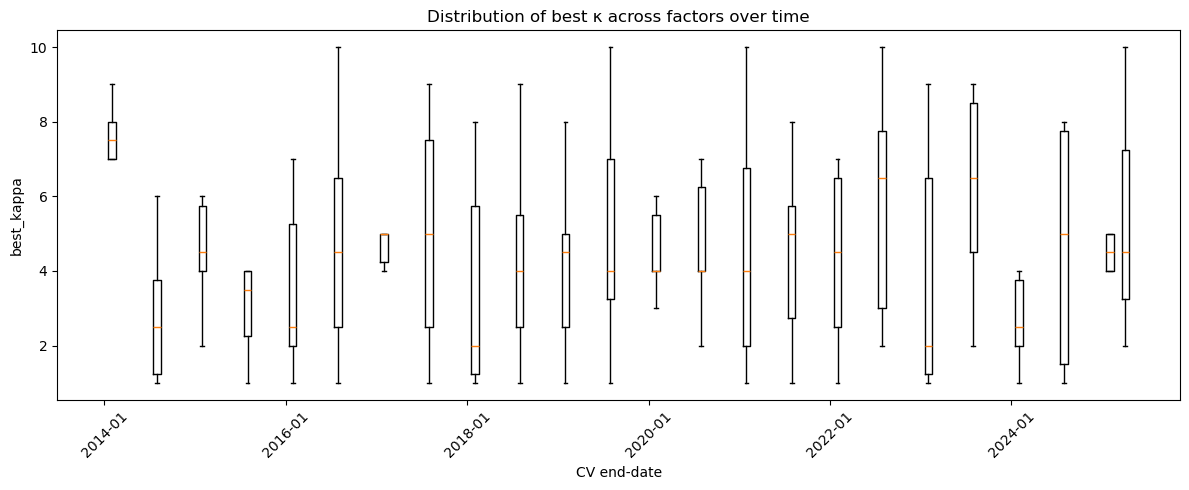

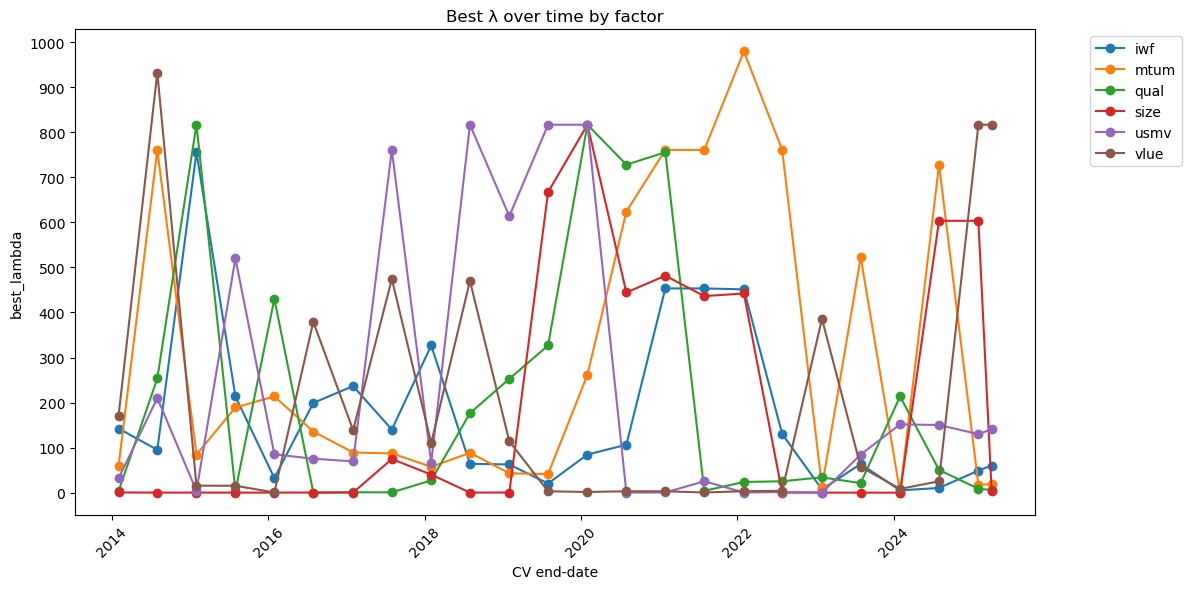

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

# 1) Load parquet and parse dates
# adjust filename as needed
df = pd.read_parquet("cv_params_bayes_v2.parquet")
df["date"] = pd.to_datetime(df["date"])

# 2) Prepare grouped data for boxplots
dates = sorted(df["date"].unique())
lam_data = [df.loc[df["date"] == d, "best_lambda"].values for d in dates]
kap_data = [df.loc[df["date"] == d, "best_kappa"].values for d in dates]
date_nums = mdates.date2num(dates)

# 3) Boxplot of best_lambda over time
fig, ax = plt.subplots(figsize=(12, 5))
ax.boxplot(lam_data, positions=date_nums, widths=30, showfliers=False)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# linear y-axis for λ with ticks every 100
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.set_xlabel('CV end-date')
ax.set_ylabel('best_lambda')
ax.set_title('Distribution of best λ across factors over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4) Boxplot of best_kappa over time
fig, ax = plt.subplots(figsize=(12, 5))
ax.boxplot(kap_data, positions=date_nums, widths=30, showfliers=False)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# linear y-axis for κ
ax.set_xlabel('CV end-date')
ax.set_ylabel('best_kappa')
ax.set_title('Distribution of best κ across factors over time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5) Per-factor λ evolution over time
fig, ax = plt.subplots(figsize=(12, 6))
for fac in df['factor'].unique():
    sub = df[df['factor'] == fac].sort_values('date')
    ax.plot(sub['date'], sub['best_lambda'], marker='o', linestyle='-', label=fac)
# set y-ticks every 100 for λ series
ax.yaxis.set_major_locator(MultipleLocator(100))
ax.set_xlabel('CV end-date')
ax.set_ylabel('best_lambda')
ax.set_title('Best λ over time by factor')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
